In [1]:
# whole standard Data Science library
import pandas as pd
import numpy as np


# setting random seed to 7
np.random.seed(7)

#vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# selected functions from Data Science libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import spearmanr, pearsonr, f_oneway, chi2_contingency

#import project modules
import src.german_credit_acquire as gca
import src.german_evaluate as ev

import os


# libraries for convenience
pd.options.display.float_format = '{:,.3f}'.format

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [62]:
train, validate, test = gca.get_german_credit()

In [33]:
df = gca.acquire_german_credit()

In [35]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [39]:
df['Job'].isna().sum()

0

In [36]:
feature_list = ['age', 'sex', 'job', 'credit amount', 'duration']

In [73]:
categorical_variable_test = ev.ftest_df(train)
categorical_variable_test

,Potential_Feature,F-stat,Significance,Keep
0,housing,4.990,0.993,Yes
1,checking,22.874,1.000,Yes
2,savings,6.048,1.000,Yes
3,job,0.603,0.386,No


In [125]:
continuous_variable_test = ev.pearson_test_df(train, 'risk', feature_list)
continuous_variable_test

,Potential_Feature,Coefficient,P-Value,Significance,Keep
0,age,0.090,0.034,0.966,Yes
1,sex,0.075,0.075,0.925,No
2,job,-0.047,0.266,0.734,No
3,credit amount,-0.157,0.000,1.000,Yes
4,duration,-0.232,0.000,1.000,Yes


## use: pd.get_dummies

- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

In [63]:
train['job'] = train.job.map({0:'unskilled_nonresident', 1:'unskilled', 2: 'skilled', 3: 'high_skill'})

train['job'] = train['job'].astype('category')

In [32]:
train['job'].isna().sum()

0

In [66]:
train_dummies = pd.get_dummies(data=train, columns=['job'])

In [68]:
train_dummies.columns

Index(['age', 'sex', 'housing', 'saving accounts', 'checking account',
       'credit amount', 'duration', 'purpose', 'risk', 'job_high_skill',
       'job_skilled', 'job_unskilled', 'job_unskilled_nonresident'],
      dtype='object')

In [75]:
feature_list = ['age', 'sex', 'credit amount', 'duration', 'job_high_skill',
       'job_skilled', 'job_unskilled', 'job_unskilled_nonresident']

In [76]:
continuous_variable_test = ev.pearson_test_df(train_dummies, 'risk', feature_list)
continuous_variable_test

,Potential_Feature,Coefficient,P-Value,Significance,Keep
0,age,0.074,0.080,0.920,No
1,sex,0.067,0.113,0.887,No
2,credit amount,-0.156,0.000,1.000,Yes
3,duration,-0.209,0.000,1.000,Yes
4,job_high_skill,-0.000,0.992,0.008,No
5,job_skilled,-0.045,0.292,0.708,No
6,job_unskilled,0.056,0.186,0.814,No
7,job_unskilled_nonresident,-0.003,0.940,0.060,No


In [134]:
train.head()

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_groups
188,20,1,skilled,own,moderate,little,674,12,radio/TV,0,early_life
849,57,1,unskilled,own,little,little,709,12,radio/TV,0,older
212,50,1,skilled,own,little,little,5293,27,business,0,older
581,49,1,unskilled,own,little,moderate,3124,12,car,1,older
721,24,0,skilled,rent,rich,moderate,433,6,education,0,early_life


In [135]:
train['risk'] = train['risk'].astype(int)

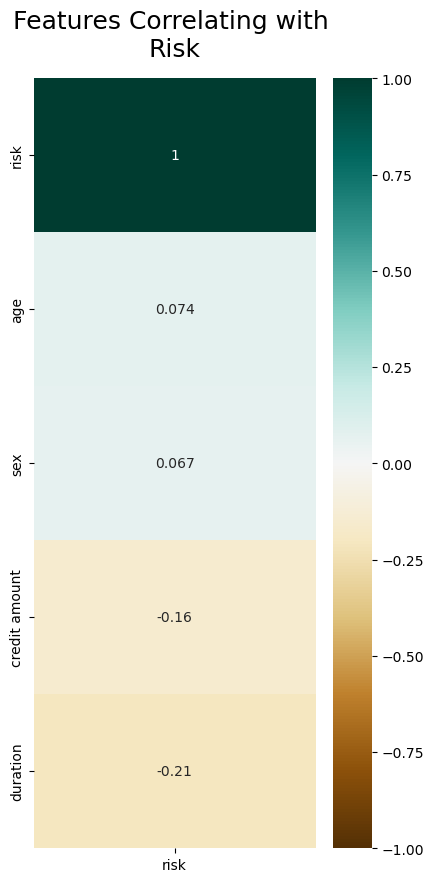

In [136]:
ev.correlate_viz(train, 'risk')

In [ ]:
heatmap = sns.heatmap(df.corr()[[target]].sort_values(by=target, ascending = False), vmin=-1, vmax=1, annot=True,cmap='BrBG')

In [137]:
train.corr()

,age,sex,credit amount,duration,risk
age,1.000,0.136,0.068,0.007,0.074
sex,0.136,1.000,0.074,0.061,0.067
credit amount,0.068,0.074,1.000,0.638,-0.156
duration,0.007,0.061,0.638,1.000,-0.209
risk,0.074,0.067,-0.156,-0.209,1.000


In [70]:
train['job'].unique().to_list()

['skilled', 'unskilled', 'high_skill', 'unskilled_nonresident']

In [78]:
def ftest_age(df):
    #f, p = f_oneway(df[df[var] 
    
    f, p = f_oneway(df[df['age_groups'] == 'early_life'].risk, 
                   df[df['age_groups'] == 'early_established'].risk,
                   df[df['age_groups'] == 'established'].risk,
                   df[df['age_groups'] == 'older'].risk)
                    
    #print(f'F-statistics: {round(f, 3)}, p: {round(1-p, 3)}')
    return f, p

In [81]:
def bin_age(df):
    #creating bins for ages

    age_groups = (19,26,33,45,75)
    age_categories = ['early_life','early_established','established','older']

    df['age_groups'] = pd.cut(df['age'],age_groups, labels=age_categories)

In [214]:
cat_var_list = ['housing', 'saving accounts', 'checking account', 'job', 'age_groups', 'loan_duration_groups']
categorical_variable_df = ev.chi2_categorical_test(train, 'risk', cat_var_list)
categorical_variable_df

,Potential_Feature,Chi2_stat,P-Value,Significance,Keep
0,housing,9.857,0.007,0.993,Yes
1,saving accounts,23.391,0.000,1.000,Yes
2,checking account,61.523,0.000,1.000,Yes
3,job,1.815,0.612,0.388,No
4,age_groups,9.731,0.021,0.979,Yes
5,loan_duration_groups,32.370,0.000,1.000,Yes


In [143]:
train.head()

,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_groups
188,1,skilled,own,moderate,little,674,12,radio/TV,0,early_life
849,1,unskilled,own,little,little,709,12,radio/TV,0,older
212,1,skilled,own,little,little,5293,27,business,0,older
581,1,unskilled,own,little,moderate,3124,12,car,1,older
721,0,skilled,rent,rich,moderate,433,6,education,0,early_life


In [150]:
train['purpose'].unique().tolist()

['radio/TV',
 'business',
 'car',
 'education',
 'repairs',
 'furniture/equipment',
 'domestic appliances',
 'vacation/others']

In [209]:
a = train[(train['duration'] < 12)]
b = train[(train['duration'] == 12)]
c = train[(train['duration'] > 12) & (train['duration'] < 36)]
d = train[(train['duration'] == 36)]
e = train[(train['duration'] > 36)]

len(a), len(b), len(c), len(d), len(e)

(106, 100, 265, 40, 49)

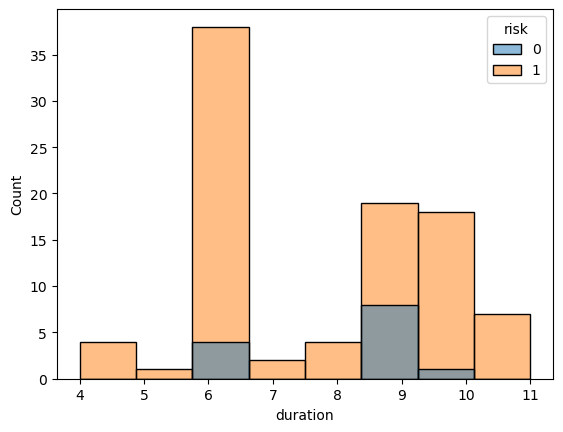

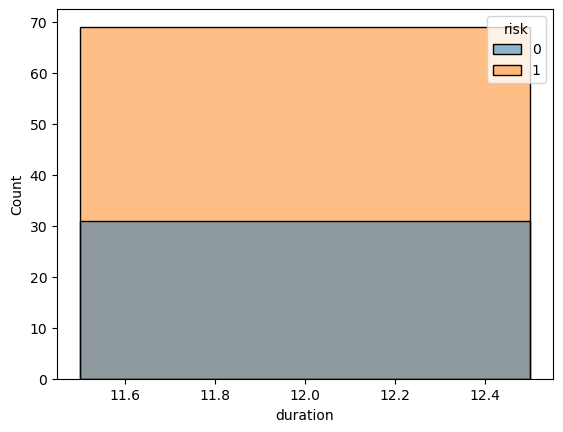

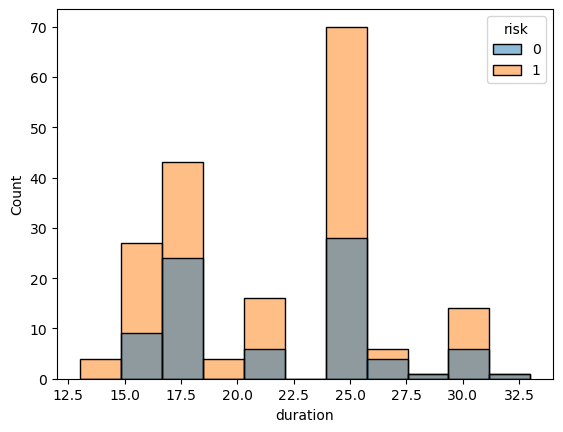

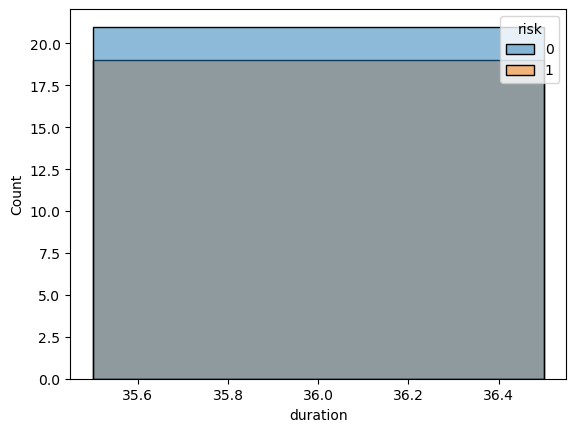

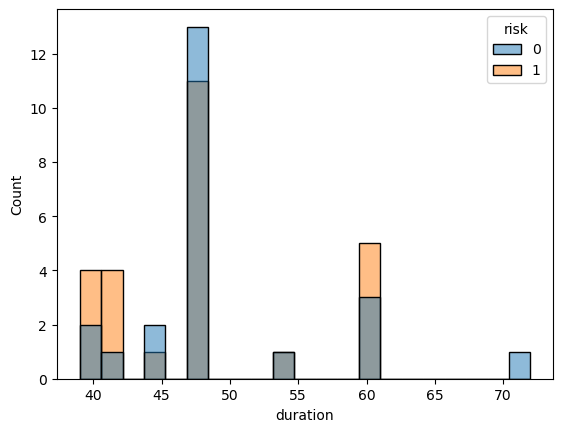

In [206]:
for i in [a,b,c,d,e]:

    sns.histplot(x= i['duration'], hue = i['risk'])
    plt.show()

In [211]:
a = pd.DataFrame
a['short_loan']==1 train[(train['duration'] < 12)]
a['year_loan'] = train[(train['duration'] == 12)]

TypeError: 'type' object does not support item assignment

In [212]:
'''
train[(train['duration'] < 12)]
train[(train['duration'] == 12)]
train[(train['duration'] > 12) & (train['duration'] < 36)]
train[(train['duration'] == 36)]
train[(train['duration'] > 36)]
'''

# the first number is the minimum value of the first group, the last number is the maximum value of the last group
# the total number of groups is the length of the list - 1
duration_groups = (0, 11, 12, 35, 36, 100)

duration_names = ('short_term_loan', 'one_year_loan','medium_term_loan', 'three_year_loan', 'long_term_loan')

train['loan_duration_groups'] = pd.cut(train['duration'], duration_groups, labels = duration_names)
del train['duration']

In [213]:
train.head()

,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_groups,loan_duration_groups
188,1,skilled,own,moderate,little,674,12,radio/TV,0,early_life,one_year_loan
849,1,unskilled,own,little,little,709,12,radio/TV,0,older,one_year_loan
212,1,skilled,own,little,little,5293,27,business,0,older,medium_term_loan
581,1,unskilled,own,little,moderate,3124,12,car,1,older,one_year_loan
721,0,skilled,rent,rich,moderate,433,6,education,0,early_life,short_term_loan


In [174]:
(train.duration < 12).sum()

106

In [159]:
sorted(train['duration'].unique().tolist())

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 20,
 21,
 22,
 24,
 27,
 28,
 30,
 33,
 36,
 39,
 40,
 42,
 45,
 47,
 48,
 54,
 60,
 72]

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 188 to 860
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sex               560 non-null    int64   
 1   job               560 non-null    category
 2   housing           560 non-null    category
 3   saving accounts   560 non-null    category
 4   checking account  560 non-null    category
 5   credit amount     560 non-null    int64   
 6   duration          560 non-null    int64   
 7   purpose           560 non-null    category
 8   risk              560 non-null    int64   
 9   age_groups        559 non-null    category
dtypes: category(6), int64(4)
memory usage: 26.4 KB
